In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nnlib.models.sequential import SequentialModel
from nnlib.layers.dense import Dense
from nnlib.activation_functions.relu import ReLu
from nnlib.activation_functions.leaky_relu import LeakyReLu
from nnlib.activation_functions.sigmoid import Sigmoid 
from nnlib.activation_functions.softmax import Softmax
from nnlib.loss_functions.bce import BinaryCrossEntropy
from nnlib.loss_functions.mse import MeanSquaredError
from nnlib.loss_functions.cce import CategoricalCrossEntropy
from nnlib.optimization_functions.adam import AdaptiveMomentEstimation
from nnlib.initialization_functions.he import He

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import tensorflow as tf
from tensorflow import keras

In [2]:
# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]


c:\Programs\Anaconda3\envs\ivc\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:

# Convert labels to integers
X = np.array(X).astype(np.float32)
X = X/255.0
y = np.array(y).astype(np.uint8).reshape(-1, 1)
# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y)

# Split the data into training (60%) and temporary (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.4, random_state=42)

# Split the temporary set equally into testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

c:\Programs\Anaconda3\envs\ivc\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20 - loss: 2.2979 - val_loss: 2.2885
Epoch 2/20 - loss: 2.2652 - val_loss: 2.2329
Epoch 3/20 - loss: 2.1799 - val_loss: 2.1164
Epoch 4/20 - loss: 2.0322 - val_loss: 1.9416
Epoch 5/20 - loss: 1.8411 - val_loss: 1.7430
Epoch 6/20 - loss: 1.6437 - val_loss: 1.5530
Epoch 7/20 - loss: 1.4630 - val_loss: 1.3856
Epoch 8/20 - loss: 1.3075 - val_loss: 1.2448
Epoch 9/20 - loss: 1.1786 - val_loss: 1.1292
Epoch 10/20 - loss: 1.0734 - val_loss: 1.0351
Epoch 11/20 - loss: 0.9876 - val_loss: 0.9584
Epoch 12/20 - loss: 0.9172 - val_loss: 0.8952
Epoch 13/20 - loss: 0.8589 - val_loss: 0.8424
Epoch 14/20 - loss: 0.8097 - val_loss: 0.7975
Epoch 15/20 - loss: 0.7675 - val_loss: 0.7589
Epoch 16/20 - loss: 0.7310 - val_loss: 0.7252
Epoch 17/20 - loss: 0.6990 - val_loss: 0.6957
Epoch 18/20 - loss: 0.6708 - val_loss: 0.6694
Epoch 19/20 - loss: 0.6456 - val_loss: 0.6459
Epoch 20/20 - loss: 0.6231 - val_loss: 0.6247


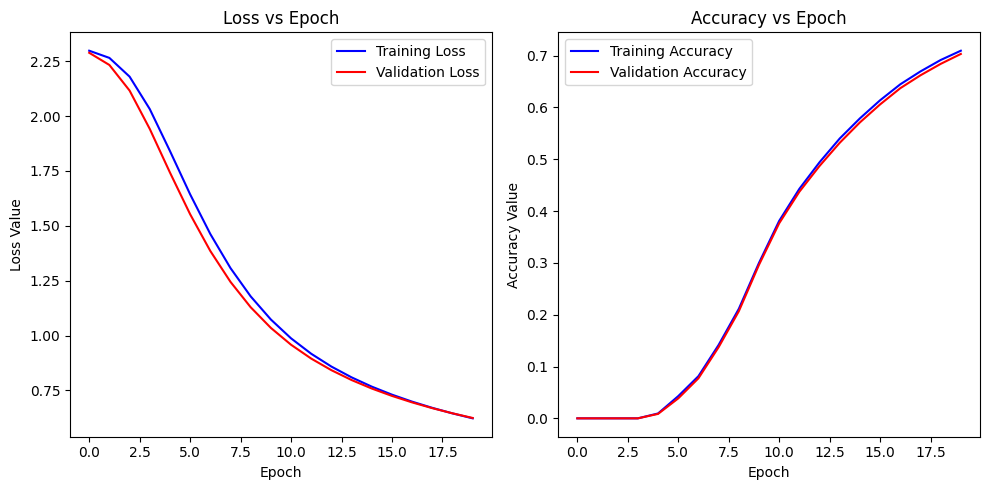

In [19]:

model = SequentialModel()

model.add(Dense(n_units= 128, input_dim=784, activation=ReLu()))
model.add(Dense(n_units= 128, input_dim=128, activation=ReLu()))
model.add(Dense(n_units = 10, input_dim = 128, activation=Softmax()))

model.compile(optimizer=AdaptiveMomentEstimation(0.0001),
              loss=CategoricalCrossEntropy(),
              initializer=He())

model.fit(X_train, y_train, epochs=20, batch_size=512, X_val=X_test, y_val=y_test, verbose=True, plot_histograms=False)

In [22]:

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test), verbose=1)
model.evaluate(X_test, y_test)

Epoch 1/20
83/83 [==============================] - 1s 7ms/step - loss: 2.2651 - accuracy: 0.4331 - val_loss: 2.2056 - val_accuracy: 0.5326
Epoch 2/20
83/83 [==============================] - 0s 6ms/step - loss: 2.1005 - accuracy: 0.5681 - val_loss: 1.9721 - val_accuracy: 0.6095
Epoch 3/20
83/83 [==============================] - 0s 6ms/step - loss: 1.8248 - accuracy: 0.6346 - val_loss: 1.6747 - val_accuracy: 0.6594
Epoch 4/20
83/83 [==============================] - 0s 5ms/step - loss: 1.5329 - accuracy: 0.7004 - val_loss: 1.4010 - val_accuracy: 0.7289
Epoch 5/20
83/83 [==============================] - 0s 6ms/step - loss: 1.2852 - accuracy: 0.7481 - val_loss: 1.1845 - val_accuracy: 0.7607
Epoch 6/20
83/83 [==============================] - 1s 6ms/step - loss: 1.0941 - accuracy: 0.7800 - val_loss: 1.0208 - val_accuracy: 0.7804
Epoch 7/20
83/83 [==============================] - 0s 5ms/step - loss: 0.9497 - accuracy: 0.8001 - val_loss: 0.8973 - val_accuracy: 0.8070
Epoch 8/20
83/83 [==

[0.4161835312843323, 0.8907142877578735]

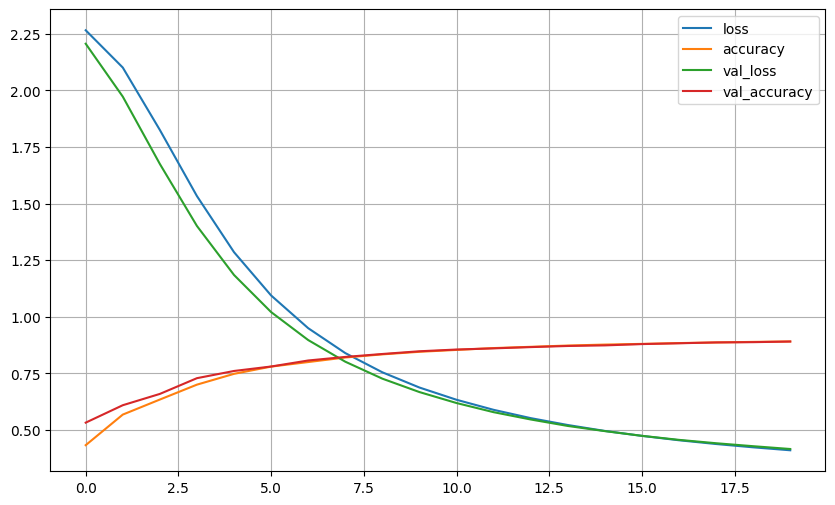

In [23]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.show()